# Trabajo Práctico 3 FMPS ##

Primeramente exportamos las librerías a utilizar

In [1]:
import numpy as np
import pylab as pl
import scipy
import math
import scipy.signal
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy import signal
np.set_printoptions(precision=2,suppress=True) #for compact outpots

#  Ejercicio 1 Convolución Circular

Use una señal finita $N$ muestras se puede representar como un vector $x \in \mathbb{C}^n$,
$$
x=\left[\begin{matrix}x[0] \\ x[1] \\ \vdots \\ x[N-1] \end{matrix}\right]
$$
Usando la convolución circular, un operador linear y homogéneo en el tiempo se puede expresar como:
$$
y=x \circledast h = C_h^o x,
$$
donde $C_h^o \in \mathbb{M}_{\mathbb{C}}(N,N)$ es una matriz de convolución parametrizada por el vector $h$, la respuesta impulsional del filtro.

Debido a los efectos de los bordes, la convolución circular $\circledast$  es poco utilizada en algoritmos de la vida real. Se
ocupa en su reemplazo la convolución discreta donde las dos señales son “rellenadas” (padding en inglés) con
zeros fuera del intervalo de muestreo:
$$
\tilde{x}[n]=\left\{\begin{matrix}  x[n] & si & 0 \leq n <N, \\
                                0 & si no & \end{matrix}\right. , \tilde{x} \in \mathbb{C}^{2N-1}
$$
$$
\tilde{h}[n]=\left\{\begin{matrix}  h[n] & si & 0 \leq n <N, \\
                                0 & si no & \end{matrix}\right. , \tilde{h} \in \mathbb{C}^{2N-1}
$$
Escribamos luego 
$$
y=x\star h = C_h x
$$
donde $C_h \in \mathbb{M}(2N-1,N).$

  1.- Dada una respuesta impulsional $h$, escriba las matrices $C_h$ y $C_h^o$. Pruebe que $C_h$ es una matriz de Toeplitz y $C_h^o$ es una matriz circulante.
 
Respuesta: Si
$$
h=\left[\begin{matrix}h[0] \\ h[1] \\ \vdots \\ h[N-1] \end{matrix}\right]
$$
entonces,
$$
C_h=\left[ \begin{matrix} 
h[0] & 0 & \dots & 0 \\
h[1] & h[0] & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
h[N-1] & h[N-2] & \dots & h[0] \\
0 & 0 & \dots & h[N-1]
\end{matrix}\right]
$$
y
$$
C_h^o=\left[ \begin{matrix} 
h[0] & h[N-1] & \dots & h[1] \\
h[1] & h[0] & \dots & h[2] \\
\vdots & \vdots & \ddots & \vdots \\
h[N-1] & h[N-2] & \dots & h[0] 
\end{matrix}\right]
$$

# Ejercicio 2 - Transformada de Fourier Discreta (DFT) y rápida (FFT).

La DFT es un operador lineal que se puede representar como una matriz $F_N = [e_0, e_1,\dots, e_{N−1}]^T \in \mathbb{M}_{\mathbb{C}}(N, N)$
donde $e_k \in \mathbb{C}^N$ es la k-ésima función de la base de Fourier:
$$
(F_N)_{k,p}=e_k[p]=e^{i\frac{2\pi (p-1)}{N}(k-1)}
$$

# 2.1 Transformada de Fourier discreta (DFT)

2.1.1.- Calcule las funciones de base de Fourier $e_k$ para todos los índices $k$ para una señal de tamaño $N = 32$.
Trazar sus partes reales e imaginarias en una figura.

Text(0, 0.5, 'amplitud parte imaginaria')

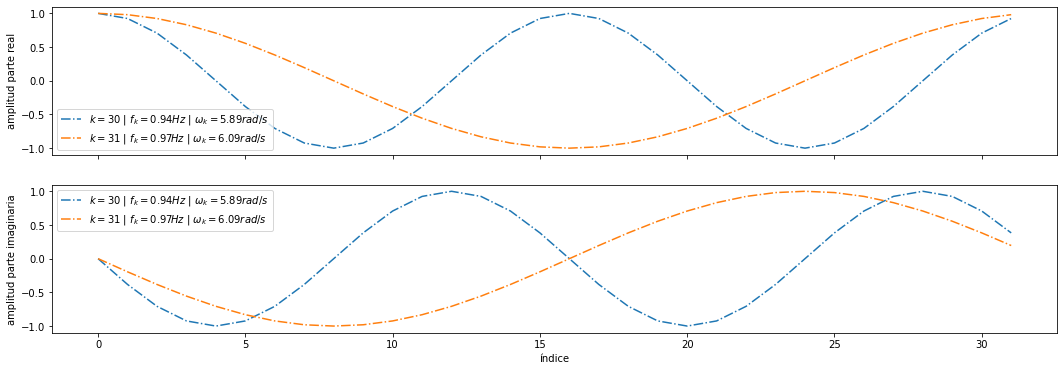

In [2]:
N=32
fig, axes= plt.subplots(2, 1, figsize=(18,6), sharex=True)
t = np.arange(0,N,1)

for k in range(N-2,N):
    fk=k/N
    wk=2*np.pi*fk
    ek=np.exp(1j*wk*t)
    o1=axes[0].plot(t,np.real(ek),'-.',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')
    o2=axes[1].plot(t,np.imag(ek),'-.',label=f'$k={k}$ | $f_k={fk:.2f} Hz$ | $\omega_k={wk:.2f} rad/s$')

axes[0].legend()
axes[0].set_ylabel('amplitud parte real')
axes[1].legend()
axes[1].set_xlabel('índice')
axes[1].set_ylabel('amplitud parte imaginaria')

2.1.2.- Calcule $F_N$ la matriz de transformada discreta de Fourier (DFT) para $N = 1, 2, 4$ y $32$. Para $N = 32$
visualíce las partes reales e imaginarias como una imagen. ¿Qué contienen las líneas de la matriz $F_N$ ?

In [3]:
def MDFT(N):
    FN=np.zeros(shape=(N,N),dtype=complex)
    omegaN=np.exp(1j*2*np.pi/N)
    for i in range(N):
        for j in range(N):
            FN[i,j]=omegaN**(i*j)
    return FN

In [4]:
MDFT(1),MDFT(2),MDFT(4)

(array([[1.+0.j]]),
 array([[ 1.+0.j,  1.+0.j],
        [ 1.+0.j, -1.+0.j]]),
 array([[ 1.+0.j,  1.+0.j,  1.+0.j,  1.+0.j],
        [ 1.+0.j,  0.+1.j, -1.+0.j, -0.-1.j],
        [ 1.+0.j, -1.+0.j,  1.-0.j, -1.+0.j],
        [ 1.+0.j, -0.-1.j, -1.+0.j,  0.+1.j]]))

In [5]:
print(MDFT(32))

[[ 1.  +0.j    1.  +0.j    1.  +0.j   ...  1.  +0.j    1.  +0.j
   1.  +0.j  ]
 [ 1.  +0.j    0.98+0.2j   0.92+0.38j ...  0.83-0.56j  0.92-0.38j
   0.98-0.2j ]
 [ 1.  +0.j    0.92+0.38j  0.71+0.71j ...  0.38-0.92j  0.71-0.71j
   0.92-0.38j]
 ...
 [ 1.  +0.j    0.83-0.56j  0.38-0.92j ... -0.2 +0.98j  0.38+0.92j
   0.83+0.56j]
 [ 1.  +0.j    0.92-0.38j  0.71-0.71j ...  0.38+0.92j  0.71+0.71j
   0.92+0.38j]
 [ 1.  +0.j    0.98-0.2j   0.92-0.38j ...  0.83+0.56j  0.92+0.38j
   0.98+0.2j ]]


In [6]:
F32=scipy.linalg.dft(32)
F32

array([[ 1.  +0.j  ,  1.  +0.j  ,  1.  +0.j  , ...,  1.  +0.j  ,
         1.  +0.j  ,  1.  +0.j  ],
       [ 1.  +0.j  ,  0.98-0.2j ,  0.92-0.38j, ...,  0.83+0.56j,
         0.92+0.38j,  0.98+0.2j ],
       [ 1.  +0.j  ,  0.92-0.38j,  0.71-0.71j, ...,  0.38+0.92j,
         0.71+0.71j,  0.92+0.38j],
       ...,
       [ 1.  +0.j  ,  0.83+0.56j,  0.38+0.92j, ..., -0.2 -0.98j,
         0.38-0.92j,  0.83-0.56j],
       [ 1.  +0.j  ,  0.92+0.38j,  0.71+0.71j, ...,  0.38-0.92j,
         0.71-0.71j,  0.92-0.38j],
       [ 1.  +0.j  ,  0.98+0.2j ,  0.92+0.38j, ...,  0.83-0.56j,
         0.92-0.38j,  0.98-0.2j ]])

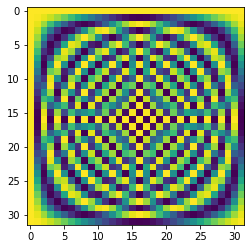

In [7]:
pl.imshow(np.real(F32))

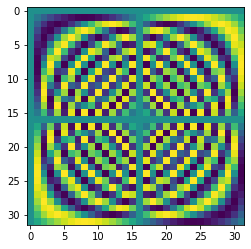

In [8]:
pl.imshow(np.imag(F32))

2.1.3.- Para una señal de largo $N = 1024$ tal que
$$
x[n]=cos(2\pi f_0 n)
$$
con $f_0=\frac{k}{N}$ para $k<\frac{N}{2}$ un entero positivo, calcule la matriz $F_N$ y aplíquela a la señal $x$. Visualice luego la magnitud del resultado en el dominio frecuencial.

In [9]:
def hat(N,f0):
    w0=2*np.pi*f0
    t=np.arange(0,N,1)
    x=np.sin(w0*t)
    Fn=scipy.linalg.dft(N)
    xhat=(1/N)*Fn.dot(x)
    w=np.arange(-1/2,1/2,1/N)
    
    return t, x, w, xhat, w0

Text(0.5, 0, 'frecuencia [Hz]')

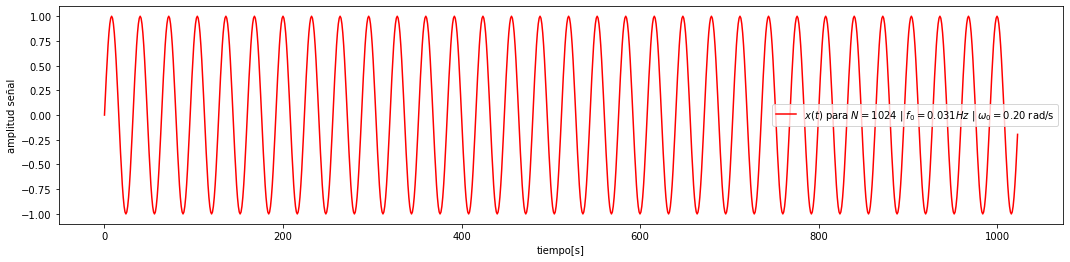

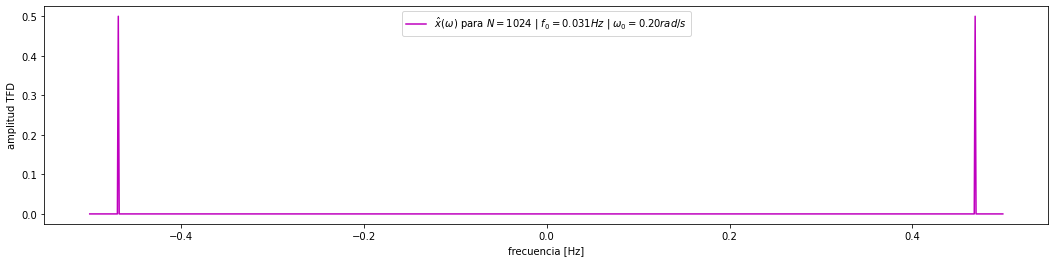

In [10]:
N1=1024
k1=32
f01=k1/N1
t1, x1, w1, xhat1, w01 = hat(N1,f01)

pl.figure(figsize=(18,4))
pl.plot(t1, x1 ,'r-',label=f'$x(t)$ para $N={N1}$ | $f_0={f01:.3f} Hz$ | $\omega_0={w01:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud señal')
pl.xlabel('tiempo[s]')


pl.figure(figsize=(18,4))
pl.plot(w1, np.abs(xhat1),'m-', label=f'$\hat x(\omega)$ para $N={N1}$ | $f_0={f01:.3f} Hz$ | $\omega_0={w01:.2f} rad/s$')
pl.legend()
pl.ylabel('amplitud TFD')
pl.xlabel('frecuencia [Hz]')

2.1.4.- Cambie $f_0$ a un valor grande tal que $k > N$. ¿Qué sucede con el espectro?

Text(0.5, 0, 'frecuencia [Hz]')

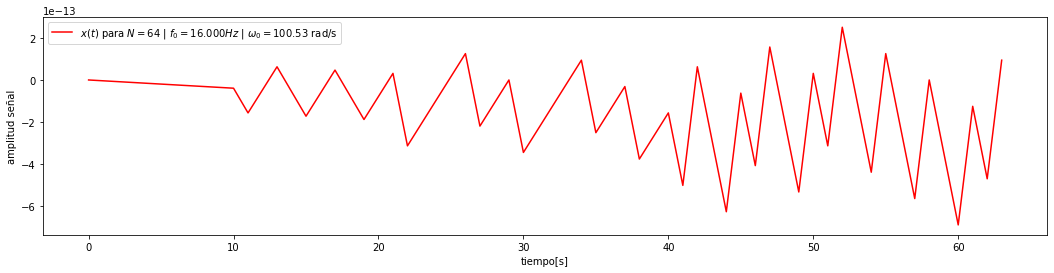

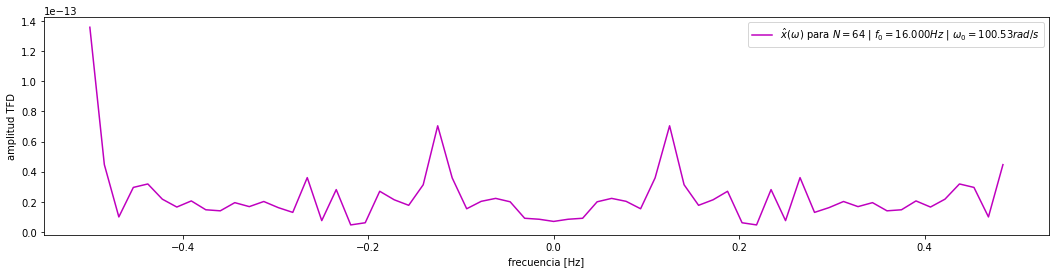

In [11]:
N2=64
k2=1024
f02=k2/N2
t2, x2, w2, xhat2, w02 = hat(N2,f02)

pl.figure(figsize=(18,4))
pl.plot(t2, x2 ,'r-',label=f'$x(t)$ para $N={N2}$ | $f_0={f02:.3f} Hz$ | $\omega_0={w02:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud señal')
pl.xlabel('tiempo[s]')


pl.figure(figsize=(18,4))
pl.plot(w2, np.abs(xhat2),'m-', label=f'$\hat x(\omega)$ para $N={N2}$ | $f_0={f02:.3f} Hz$ | $\omega_0={w02:.2f} rad/s$')
pl.legend()
pl.ylabel('amplitud TFD')
pl.xlabel('frecuencia [Hz]')

# 2.2 Transformada de Fourier Rápida (FFT)

2.2.1.- Mida el tiempo de cálculo de la DFT con y sin el cálculo previo de la matriz de Fourier $F_N$ para $N = 1024$.

In [12]:
def hatsinfn(N,f0):
    w02=2*np.pi*f0
    t2=np.arange(0,N,1)
    x2=np.sin(w02*t2)
    Fn2=MDFT(N)
    xhat2=(1/N)*Fn2.dot(x2)
    w2=np.arange(-1/2,1/2,1/N)
    
    return t2, x2, w2, xhat2, w02

El tiempo que se demoró con el calculo previo fue de 0.15999937057495117


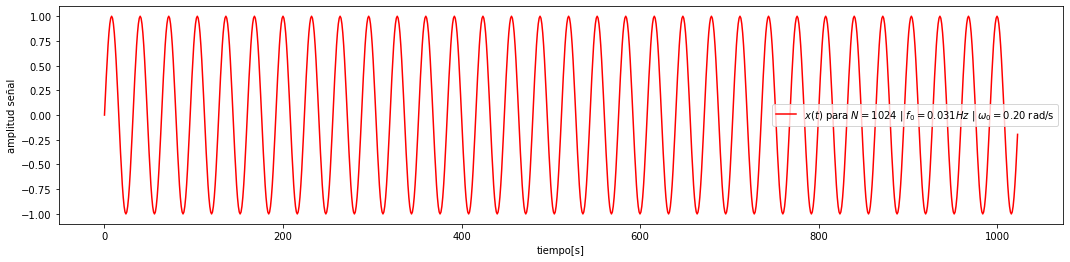

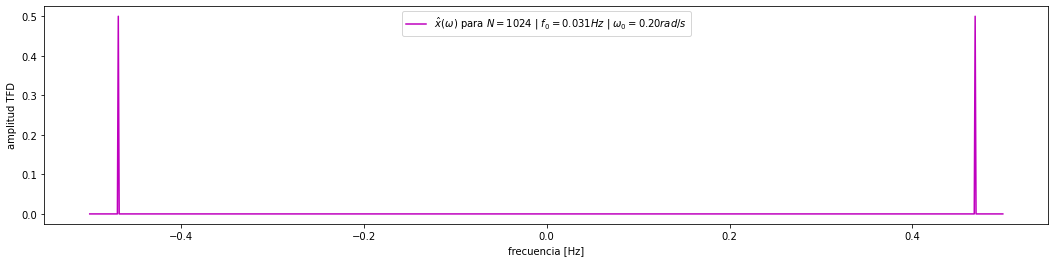

In [13]:
#para con el calculo previo
import time
start = time.time()
N3=1024
k3=32
f03=k3/N3
t3, x3, w3, xhat3, w03 = hat(N3,f03)

pl.figure(figsize=(18,4))
pl.plot(t3, x3 ,'r-',label=f'$x(t)$ para $N={N3}$ | $f_0={f03:.3f} Hz$ | $\omega_0={w03:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud señal')
pl.xlabel('tiempo[s]')


pl.figure(figsize=(18,4))
pl.plot(w3, np.abs(xhat3),'m-', label=f'$\hat x(\omega)$ para $N={N3}$ | $f_0={f03:.3f} Hz$ | $\omega_0={w03:.2f} rad/s$')
pl.legend()
pl.ylabel('amplitud TFD')
pl.xlabel('frecuencia [Hz]')

end = time.time()
print('El tiempo que se demoró con el calculo previo fue de',end - start)

El tiempo que se demoró sin el calculo previo fue de 0.5780012607574463


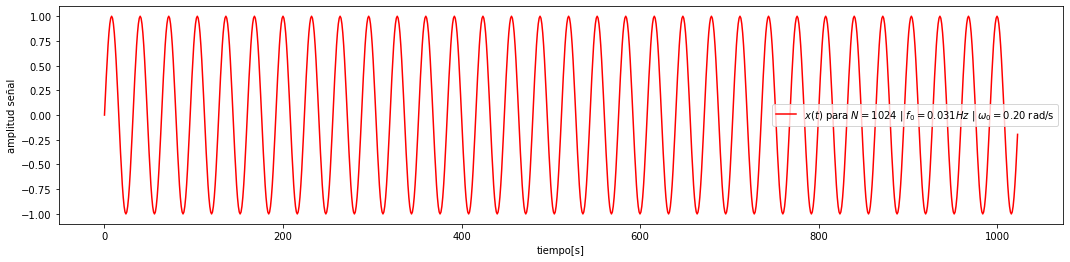

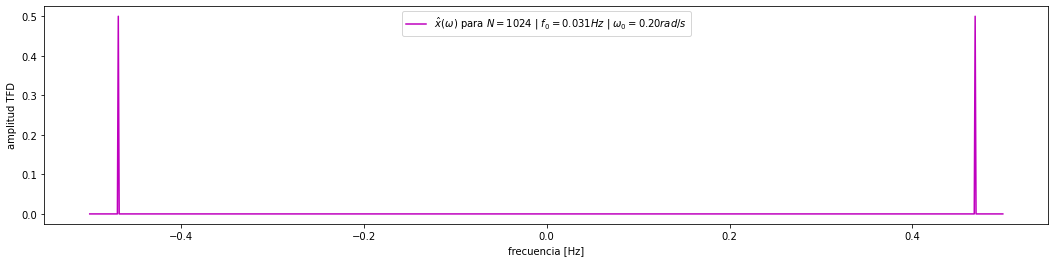

In [14]:
#para sin el calculo previo
import time
start = time.time()
N4=1024
k4=32
f04=k4/N4
t4, x4, w4, xhat4, w04 = hatsinfn(N4,f04)

pl.figure(figsize=(18,4))
pl.plot(t4, x4 ,'r-',label=f'$x(t)$ para $N={N4}$ | $f_0={f04:.3f} Hz$ | $\omega_0={w04:.2f}$ rad/s')
pl.legend()
pl.ylabel('amplitud señal')
pl.xlabel('tiempo[s]')


pl.figure(figsize=(18,4))
pl.plot(w4, np.abs(xhat4),'m-', label=f'$\hat x(\omega)$ para $N={N4}$ | $f_0={f04:.3f} Hz$ | $\omega_0={w04:.2f} rad/s$')
pl.legend()
pl.ylabel('amplitud TFD')
pl.xlabel('frecuencia [Hz]')

end = time.time()
print('El tiempo que se demoró sin el calculo previo fue de',end - start)

Así se demoró sin el cálculo previo un tiempo de 0.5059964656829834 y con el cálculo previo un tiempo de 0.1589646339416504

2.2.2.-

El tiempo que se demoró la fft fue de 0.012998580932617188


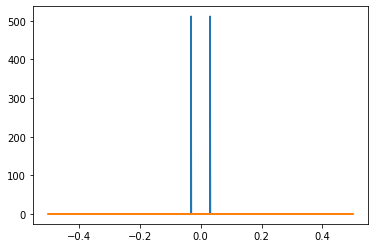

In [15]:
import time
start = time.time()
N5=1024
k5=32
f05=k5/N5
t=np.arange(0,N5,1)
sp=np.fft.fft(np.cos(2*np.pi*f05*t),N5)
freq=np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
end = time.time()
print('El tiempo que se demoró la fft fue de',end - start)

In [16]:
t_dft=0.1589646339416504
t_fft=0.015998363494873047
delta=abs(t_dft-t_fft)
mejora=(delta/t_dft)*100
print('aumentó un' ,mejora, '% la velocidad')

aumentó un 89.93589762818225 % la velocidad


2.2.3.- Calcule y almacene el tiempo computacional de la DFT, la DFT con la matriz precalculada y la FFT para
$N = 1000k$ muestreados logarítmicamente de $k = 2$ a $k = 12$. Grafique en gráfico log vs log los diferentes
tiempos computacionales en función de N. Discuta lo observado.

Text(0.5, 0, 'N')

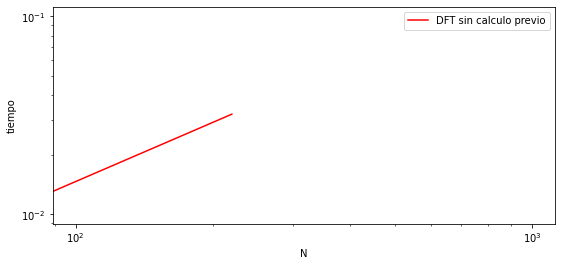

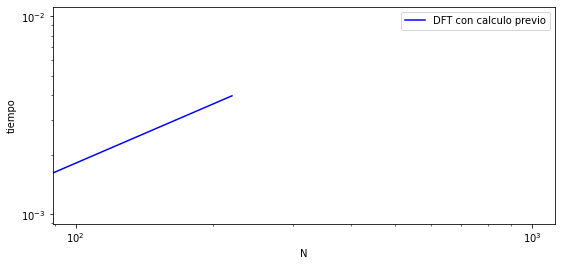

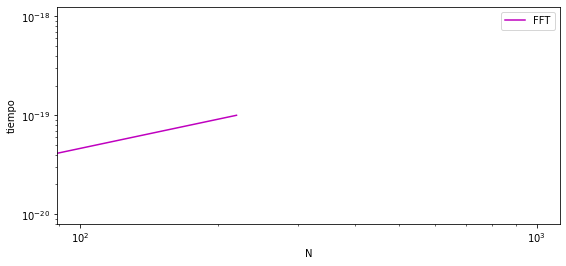

In [17]:
import time
for k in range(2,12):
    N6=20*k
    f06=k/N6
    N=np.zeros(shape=10)
    DFTSM=np.zeros(shape=10)
    DFTCM=np.zeros(shape=10)
    FFT=np.zeros(shape=10)
    t=np.arange(0,N6,1)
    start1 = time.time()
    tp, xp, wp, xhatp, w0p = hatsinfn(N6,f06)
    end1 = time.time()
    start2 = time.time()
    tp1, xp1, wp1, xhatp1, w0p1 = hat(N6,f06)
    end2 = time.time()
    start3 =time.time()
    sp=np.fft.fft(np.cos(2*np.pi*f06*t),N6)
    end3=time.time()
    N[k-2]=N6
    DFTSM[k-2]=end1-start1
    DFTCM[k-2]=end2-start2
    FFT[k-2]=end3-start3+1*10**(-19)
    
pl.figure(figsize=(9,4))
pl.plot(N, DFTSM ,'r-',label='DFT sin calculo previo')
pl.legend()
plt.xscale('log')
plt.yscale('log')
pl.ylabel('tiempo')
pl.xlabel('N') 

pl.figure(figsize=(9,4))
pl.plot(N, DFTCM ,'b-',label='DFT con calculo previo')
pl.legend()
plt.xscale('log')
plt.yscale('log')
pl.ylabel('tiempo')
pl.xlabel('N') 

pl.figure(figsize=(9,4))
pl.plot(N, FFT ,'m-',label='FFT')
pl.legend()
plt.xscale('log')
plt.yscale('log')
pl.ylabel('tiempo')
pl.xlabel('N') 

Es cosa de ver la escala logarítmica en el tiempo para ver que es mucho más rápido el FFT, es más para que no hubieran problemas con los 0 y el logaritmo, tuve que sumar un $1*10^{-19}$ al tiempo del FFT.

# 3 Interpretación de señales

Para todas las señales que se describen a continuación, siga los siguientes pasos:

 1.-Cargue la señal en la memoria y almacene tanto la señal $x$ como la frecuencia de muestreo $f_s$.
 
 2.-Trace la señal en el tiempo con el eje x adecuado (tiempo en segundos). 
 
 3.-Grafique la magnitud de la señal FFT con la frecuencia real correspondiente centrada alrededor de 0.
 
 4.-Interprete y discuta las propiedades de la señal en frecuencia utilizando la información proporcionada
sobre cada señal en las descripciones a continuación. Cuando sea posible, recupere parámetros físicos
como la constante de tiempo de las frecuencias fundamentales de las señales cuando sea posible. Puede
hacer zoom en parte de un gráfico utilizando `pl.xlim([xmin, xmax]).`

Lista de señales y su nombre de archivo correspondiente. Algunas se han guardado en los trabajos prácticos
anteriores y las demás se pueden descargar desde el repositorio github del curso.

**• A4.wav contiene la nota MIDI m = 69.**





sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

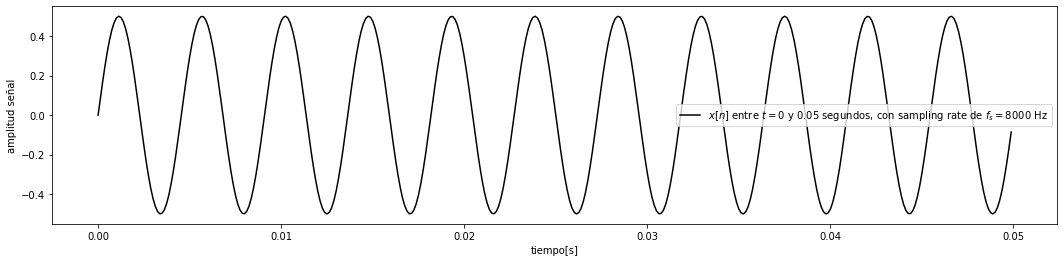

In [18]:
fs1,x1=wavfile.read('data/A4.wav')
print(f"sampling rate = {fs1}")

pl.figure(figsize=(18,4))
k=400
t=np.arange(0,len(x1)/fs1,1/fs1)

pl.plot(t[:k],x1[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs1}$ segundos, con sampling rate de $f_s={fs1}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.02, 0.03)

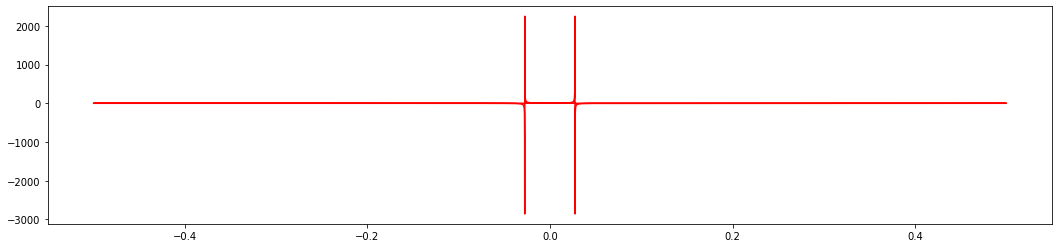

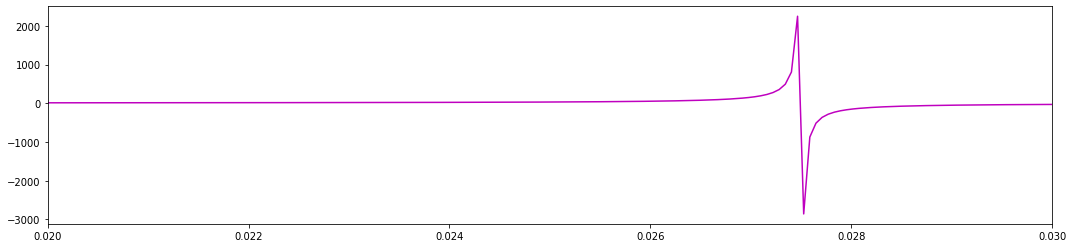

In [19]:
n=2**14
xhat1=np.fft.fft(x1,n=n)
freq1=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq1,xhat1.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq1[int(n/2):],xhat1.real[int(n/2):], 'm-')
pl.xlim([0.02,0.03])

**• seq.wav contiene la secuencia de notas generada en el TP N° 2.**

sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

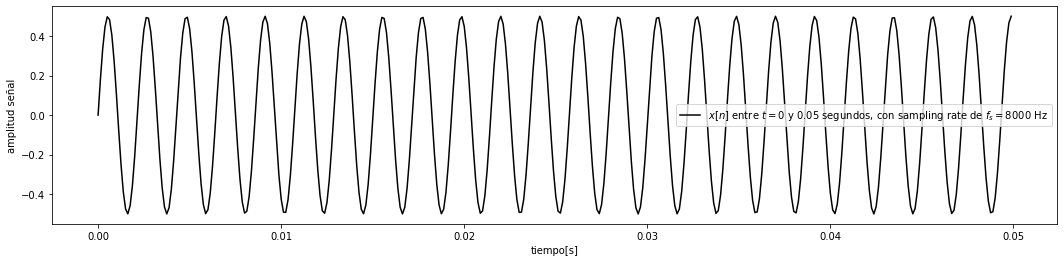

In [20]:
fs2,x2=wavfile.read('data/seq.wav')
print(f"sampling rate = {fs2}")

pl.figure(figsize=(18,4))
k=400
t=np.arange(0,len(x2)/fs2,1/fs2)

pl.plot(t[:k],x2[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs2}$ segundos, con sampling rate de $f_s={fs2}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.04, 0.08)

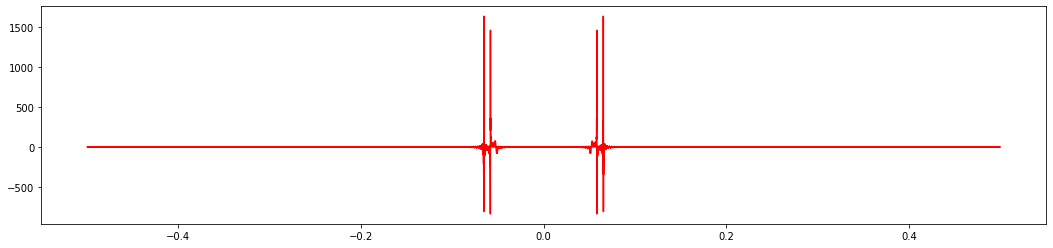

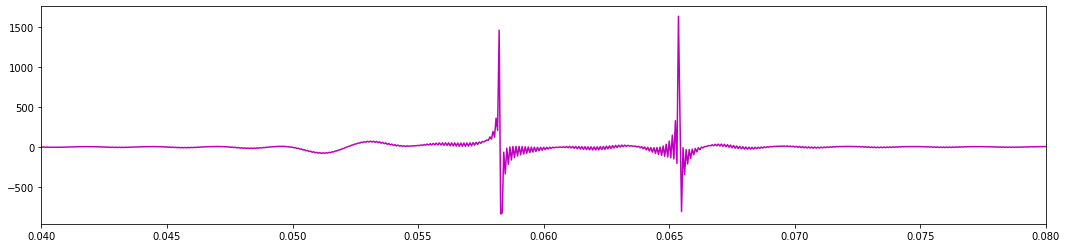

In [21]:
n=2**14
xhat2=np.fft.fft(x2,n=n)
freq2=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq2,xhat2.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq2[int(n/2):],xhat2.real[int(n/2):], 'm-')
pl.xlim([0.04,0.08])

• chirp.wav contiene una señal de modulación de frecuencia de chirp. ¿Cuáles son las frecuencias instantáneas en esta señal? ¿Cuál es el soporte de su espectro?

sampling rate = 8000


Text(0, 0.5, 'amplitud señal')

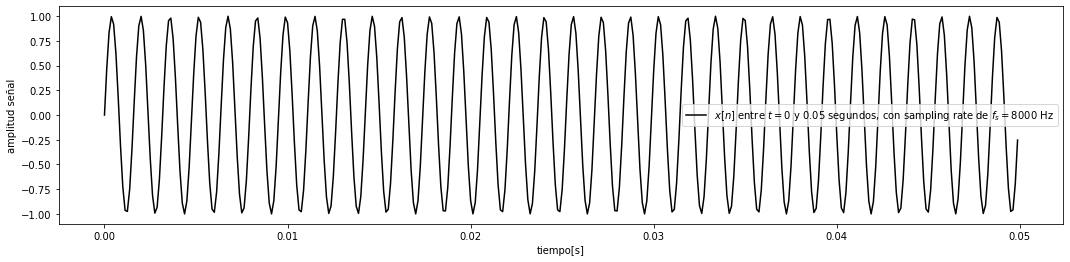

In [22]:
fs3,x3=wavfile.read('data/chirp.wav')
print(f"sampling rate = {fs3}")

pl.figure(figsize=(18,4))
k=400
t=np.arange(0,len(x3)/fs3,1/fs3)

pl.plot(t[:k],x3[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs3}$ segundos, con sampling rate de $f_s={fs3}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.05, 0.23)

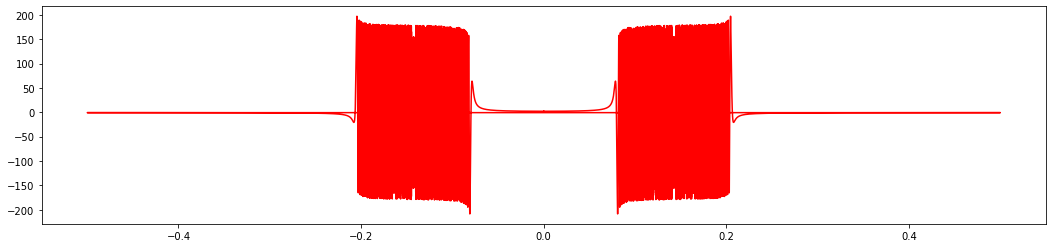

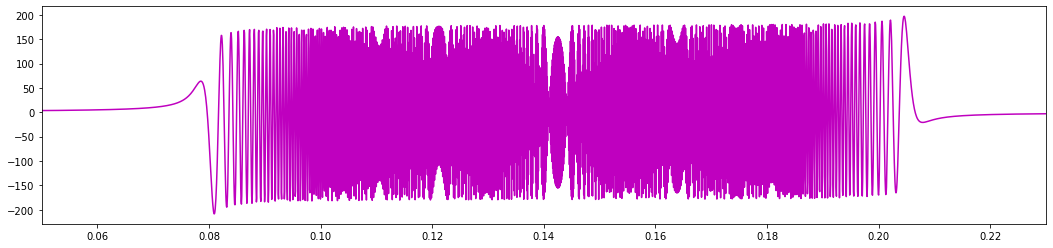

In [23]:
n=2**14
xhat3=np.fft.fft(x3,n=n)
freq3=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq3,xhat3.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq3[int(n/2):],xhat3.real[int(n/2):], 'm-')
pl.xlim([0.050,0.230])

• uku.wav y uku2.wav contienen una nota “mal” interpretada en un ukelele. ¿Cuáles son las notas tocadas?
¿Cuáles son sus números MIDI correspondientes?

sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

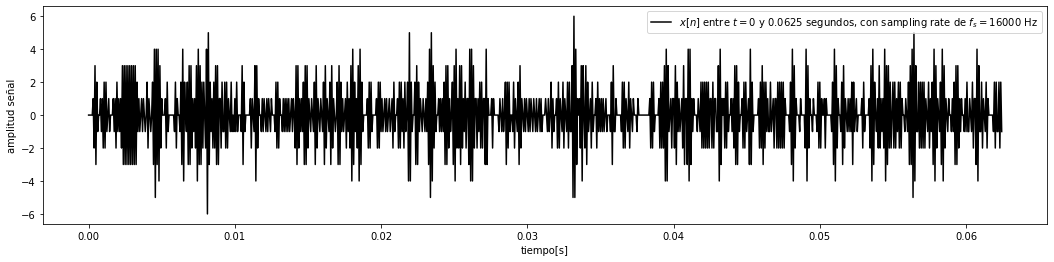

In [24]:
fs4,x4=wavfile.read('data/uku_chords.wav')
print(f"sampling rate = {fs4}")

pl.figure(figsize=(18,4))
k=1000
t=np.arange(0,len(x4)/fs4,1/fs4)

pl.plot(t[:k],x4[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs4}$ segundos, con sampling rate de $f_s={fs4}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.1, 0.3)

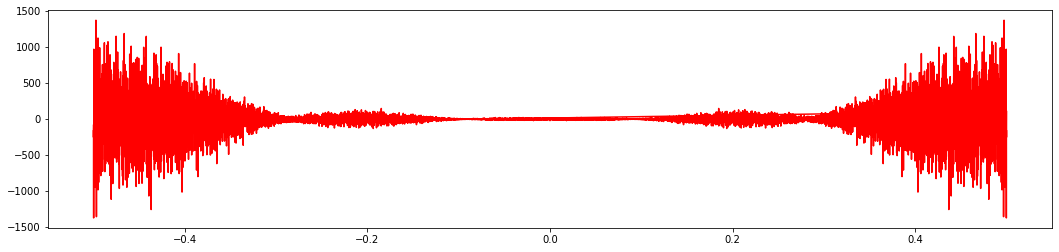

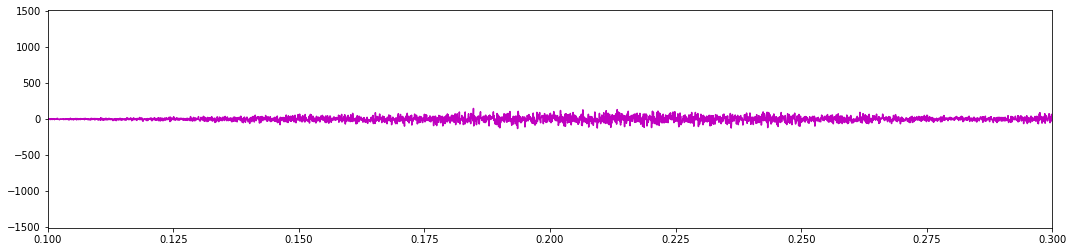

In [25]:
n=2**14
xhat4=np.fft.fft(x4,n=n)
freq4=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq4,xhat4.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq4[int(n/2):],xhat4.real[int(n/2):], 'm-')
pl.xlim([0.10,0.30])

• drum.wav es una grabación de una ejecución de batería que contiene un bombo y un platillo, correspondientes respectivamente a una señal de baja frecuencia y alta frecuencia.


sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

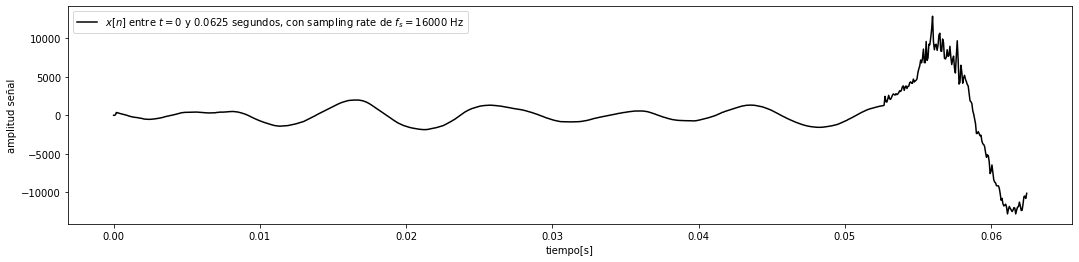

In [26]:
fs5,x5=wavfile.read('data/drum.wav')
print(f"sampling rate = {fs5}")

pl.figure(figsize=(18,4))
k=1000
t=np.arange(0,len(x5)/fs5,1/fs5)

pl.plot(t[:k],x5[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs5}$ segundos, con sampling rate de $f_s={fs5}$ Hz')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.0, 0.2)

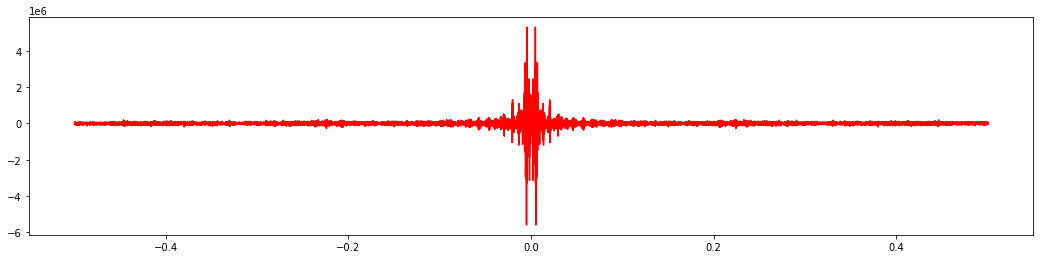

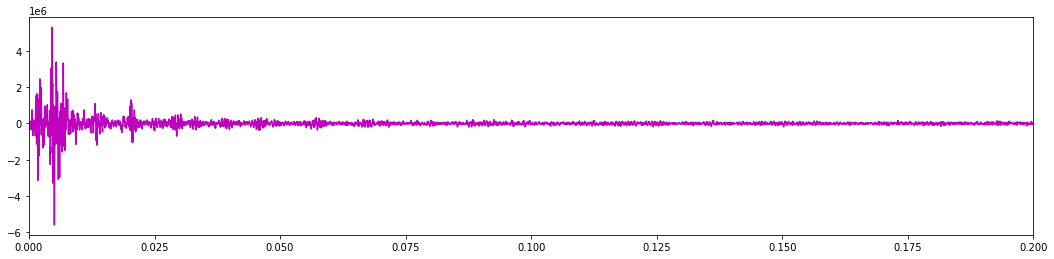

In [27]:
n=2**14
xhat5=np.fft.fft(x5,n=n)
freq5=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq5,xhat5.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq5[int(n/2):],xhat5.real[int(n/2):], 'm-')
pl.xlim([0,0.2])

• stairway.wav y stairwayb.wav contiene 10 segundos del comienzo de una canción conocida. El segundo
archivo ha sido dañado por ruido. Haga un zoom en las frecuencias bajas y encuentre el modo. ¿Cuál es
la nota midi correspondiente a este modo que es la nota más tocada en la secuencia? ¿Cuál es el soporte
en frecuencia del ruido agregado?

sampling rate = 44100
sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

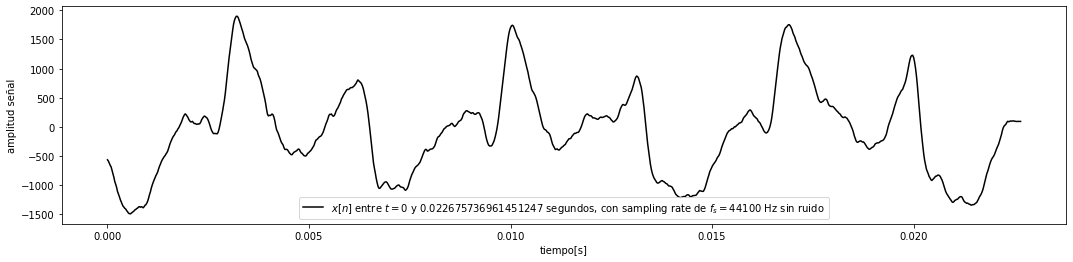

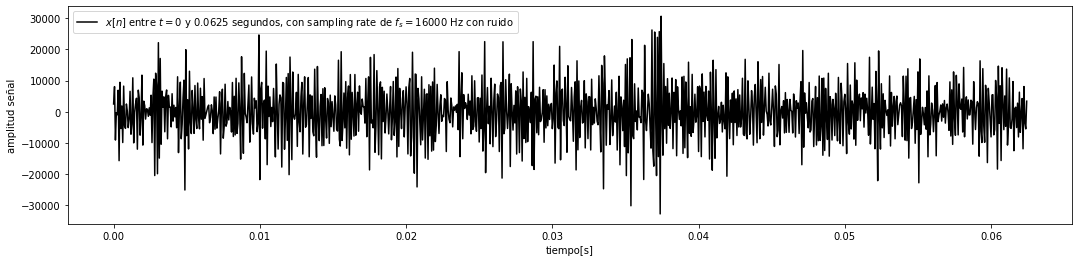

In [28]:
fs6,x6=wavfile.read('data/stairway.wav')
fs7,x7=wavfile.read('data/stairwayb.wav')
print(f"sampling rate = {fs6}")
print(f"sampling rate = {fs7}")


k1=1000
t1=np.arange(0,len(x6)/fs6,1/fs6)
pl.figure(figsize=(18,4))
pl.plot(t1[:k1],x6[:k1],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs6}$ segundos, con sampling rate de $f_s={fs6}$ Hz sin ruido')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')
k2=1000
t2=np.arange(0,len(x7)/fs7,1/fs7)
pl.figure(figsize=(18,4))
pl.plot(t2[:k2],x7[:k2],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs7}$ segundos, con sampling rate de $f_s={fs7}$ Hz con ruido')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

(0.0, 0.1)

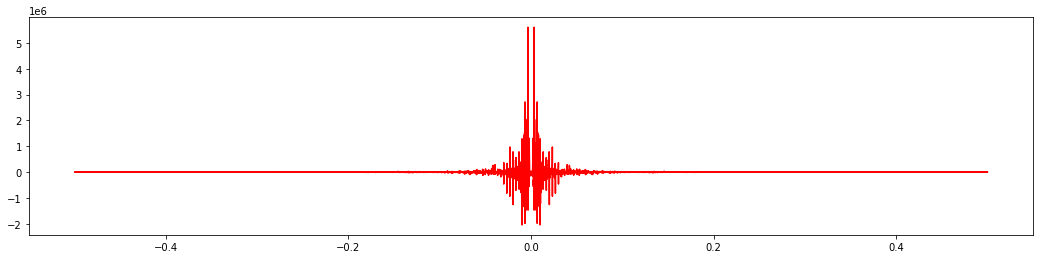

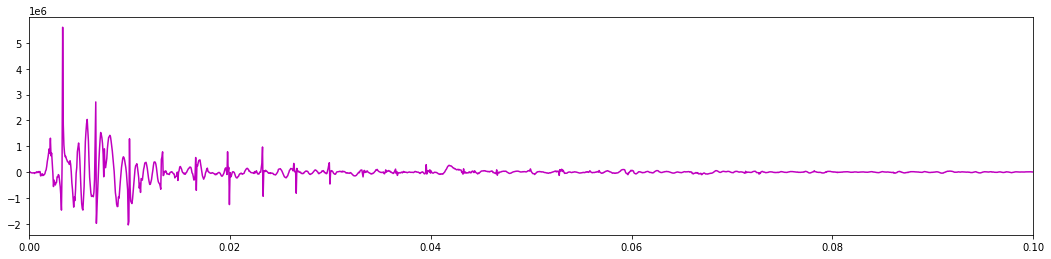

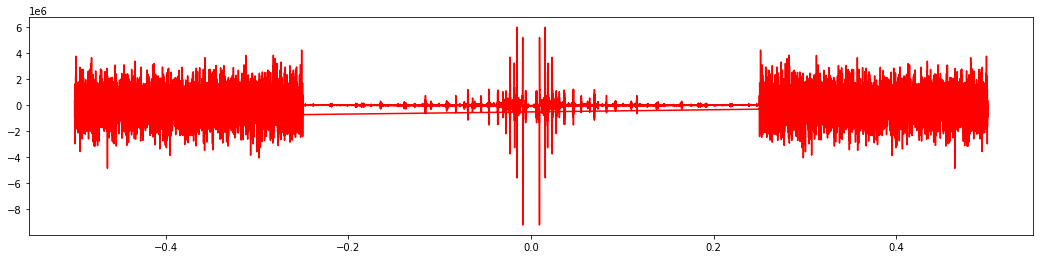

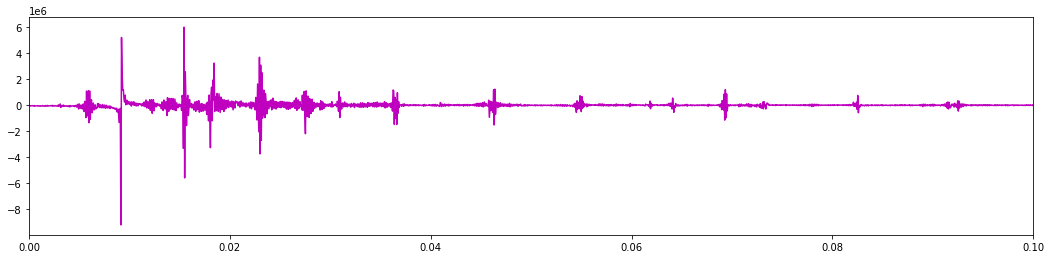

In [29]:
n=2**14
xhat6=np.fft.fft(x6,n=n)
freq6=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq6,xhat6.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq6[int(n/2):],xhat6.real[int(n/2):], 'm-')
pl.xlim([0,0.1])

xhat7=np.fft.fft(x7,n=n)
freq7=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq7,xhat7.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq7[int(n/2):],xhat7.real[int(n/2):], 'm-')
pl.xlim([0,0.1])

# 4 Filtraje Digital

En esta sección estudiaremos varios filtros digitales y los aplicaremos a señales.

# 4.1 Filtraje ideal

1.Cargue la señal en el archivo “stairwayb.wav”. Intentaremos atenuar el ruido presente en el audio cortando
toda la banda de frecuencia donde hay ruido.

sampling rate = 16000


Text(0, 0.5, 'amplitud señal')

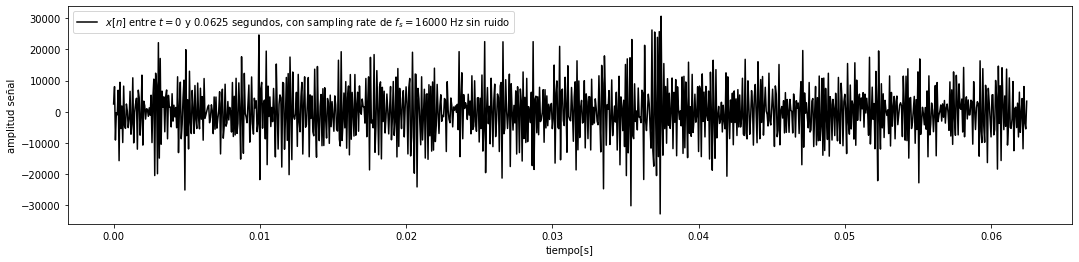

In [32]:
fs,x=wavfile.read('data/stairwayb.wav')
print(f"sampling rate = {fs}")
k=1000
t=np.arange(0,len(x)/fs,1/fs)
pl.figure(figsize=(18,4))
pl.plot(t[:k],x[:k],'k-', label=f'$x[n]$ entre $t=0$ y ${k/fs}$ segundos, con sampling rate de $f_s={fs}$ Hz sin ruido')
pl.legend()
pl.xlabel('tiempo[s]')
pl.ylabel('amplitud señal')

2.Calcule la FFT de la señal y grafique su magnitud en el dominio de Fourier. Seleccione una frecuencia de
corte $f_c$ para un filtro de paso bajo ideal.

In [31]:
n=2**14
xhat=np.fft.fft(x,n=n)
freq=np.fft.fftfreq(n,-1)

pl.figure(figsize=(18,4))
pl.plot(freq,xhat.real, 'r-')

pl.figure(figsize=(18,4))
pl.plot(freq[int(n/2):],xhat.real[int(n/2):], 'm-')
pl.xlim([0,0.2])

MemoryError: Unable to allocate 108. GiB for an array with shape (441000, 16384) and data type complex128

3.Aplique un filtro ideal “low-pass” con una frecuencia de corte $f_c$. Escuche la señal filtrada. Tenga en
cuenta que guardar un archivo wav en formato flotante recorta los valores entre −1 y 1, por lo que la señal
se debe escalar correctamente para evitar la saturación.

In [ ]:
fc=0.25
Nc=int(fc*n)
window=np.ones(n)
window[0:Nc]=0
window[n-Nc:]=0

print(window.shape)

pl.figure(figsize=(18,4))
pl.plot(xhat.real/np.max(xhat.real), 'r-')
pl.plot(window, 'b-')

xhatfilt=np.multiply(xhat,window)
xfilt=np.fft.ifft(xhatfilt)

pl.figure(figsize=(18,4))
pl.plot(t[:k],x[:k], 'k-')
pl.plot(t[:k],xfilt[:k].real, 'c-')

wavfile.write(filename='data/stairwayFilt.wav', rate=fs, data=x/x.max())